In [9]:
import scipy as sp
import scipy.integrate as sp_int
import matplotlib.pyplot as plt
import math
import numpy as np

In [ ]:
# Example of a network with P(1) = 0.5, P(3) = 0.5

In [20]:
def calc_g(lamda, x):
    return 0 + 0.5*x + 0*x**2 + 0.5*x**3
    
def calc_g1(lamda, x): 
    return 0.5 + 2*0*x + 3*0.5*x**2
    
def calc_g2(lamda, x):
    return 3*0.5*2*x

In [21]:
def derv(x,t,lam,rr,mm,pp, calc_g, calc_g1, calc_g2):
    #y[0]= change of theta 
    #y[1]= change of p_infec 
    #y[2]= change of p_suscep 
    #y[3]= proportion of S 
    #y[4]= change of M_I 
    #y[5]= change of I
    y=list(range(6))#zeros(6);
    y[0]=-rr*x[1]*x[0] 
    y[1]=rr*x[2]*x[1]*x[0]*calc_g2(lam,x[0])/calc_g1(lam,x[0])-rr*x[1]*(1-x[1])-x[1]*mm+pp*(x[4]-x[1]) 
    y[2]=rr*x[2]*x[1]*(1-x[0]*calc_g2(lam,x[0])/calc_g1(lam,x[0]))+pp*(x[0]*calc_g1(lam,x[0])/calc_g1(lam,1)-x[2])
    y[3]=-rr*x[1]*x[0]*calc_g1(lam,x[0]) 
    y[4]=-mm*x[4]+rr*x[1]*(x[0]**2*calc_g2(lam,x[0])+x[0]*calc_g1(lam,x[0])/calc_g1(lam,1)) 
    y[5]=rr*x[1]*x[0]*calc_g1(lam,x[0])-mm*x[5]
    return(y)

In [22]:
# lamda = pw_pgf.powerlaw_p_vec(2.218, 75)
r = 0.2
mu = 0.2
ro = 0.2
epsilon = 0.001
time = list(range(0,200))
# time = np.linspace(0,200,0.1)
init = [1 - epsilon, # proportion susceptible at start
       epsilon / (1 - epsilon), #
       (1 - 2*epsilon)/(1 - epsilon), #
       calc_g(lamda, 1 - epsilon), #
       epsilon, #
       1 - calc_g(lamda, 1- epsilon) # 
       ]

out=sp_int.odeint(derv, init, time, args=(lamda,r,mu,ro, 
                                          calc_g,calc_g1,calc_g2))

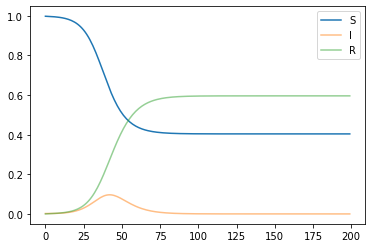

In [26]:
# plt.plot(pop_tap[:,0], alpha =0.5) # change of theta
# plt.plot(pop_tap[:,1])#change of p_infec 
# plt.plot(pop_tap[:,2]) change of p_suscep 
plt.plot(out[:,3], label = 'S') #proportion of S
# plt.plot(pop_tap[:,4], alpha = 0.5) change of M_I 
plt.plot(out[:,5], alpha = 0.5, label = 'I') # change of I
# recovered
plt.plot(1 - (out[:,5]+out[:,3]), alpha = 0.5, label= 'R')
plt.legend()

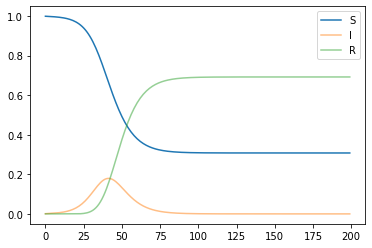

In [28]:
# plt.plot(pop_tap[:,0], alpha =0.5) # change of theta
# plt.plot(pop_tap[:,1])#
# plt.plot(pop_tap[:,2])
plt.plot(out[:,2], label = 'S')
# plt.plot(pop_tap[:,4], alpha = 0.5)
plt.plot(out[:,4], alpha = 0.5, label = 'I')
# recovered
plt.plot(1 - (out[:,2]+out[:,4]), alpha = 0.5, label= 'R')
plt.legend()

In [27]:
max(out[:,5])

0.09652541014774602

In [23]:
N = 10_000
pop_tap = out * N

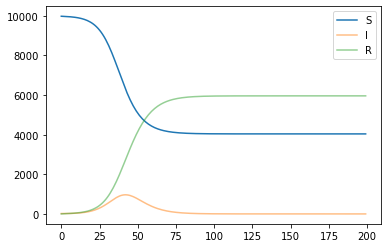

In [24]:
# plt.plot(pop_tap[:,0], alpha =0.5) # change of theta
# plt.plot(pop_tap[:,1])#
# plt.plot(pop_tap[:,2])
plt.plot(pop_tap[:,3], label = 'S')
# plt.plot(pop_tap[:,4], alpha = 0.5)
plt.plot(pop_tap[:,5], alpha = 0.5, label = 'I')
# recovered
plt.plot(10_000 - (pop_tap[:,5]+pop_tap[:,3]), alpha = 0.5, label= 'R')
plt.legend()

In [25]:
# final size
N - (pop_tap[:,5]+pop_tap[:,3])[199:]

array([5960.32875292])